In [2]:
# Imports
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression, RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [19]:
# Define the schema
field_names = [
    "State",
    "AccountLength",
    "AreaCode",
    "Phone",
    "IntlPlan",
    "VMailPlan",
    "VMailMessage",
    "DayMins",
    "DayCalls",
    "DayCharge",
    "EveMins",
    "EveCalls",
    "EveCharge",
    "NightMins",
    "NightCalls",
    "NightCharge",
    "IntlMins",
    "IntlCalls",
    "IntlCharge",
    "CustServCalls",
    "Churn"]

fields = [StructField(field_name, StringType(), True) for field_name in field_names]
churn_schema = StructType(fields)

In [9]:
# Create our spark context
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Predicting Customer Churn") \
    .getOrCreate()

In [20]:
# Read the data set
churn_dataset = spark.read.option("header", "true") \
    .schema(churn_schema) \
    .csv("/vagrant/data/churn.csv")

In [24]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import pandas
import numpy

NUM_BINS = 10

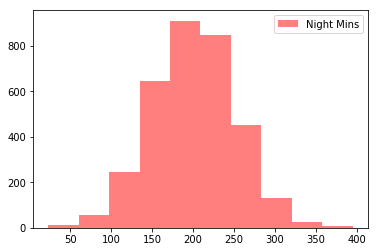

In [28]:
n, bins, patches = plt.hist(numpy.array(churn_dataset.select("NightMins").rdd.collect()).astype(numpy.float), NUM_BINS, normed=0, facecolor='red', alpha=0.5, label="Night Mins")
plt.legend(loc='upper right')
plt.show()